In [4]:
# 10/06/21
# 0|1
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform
#import math
#pi = math.pi
import numpy as np # numpy library has more advantages than math

In [26]:
# Helper functions for genetating data

import numpy as np 

def gaussian(x, y, mux, muy, covx, covy):

    sigmax = np.sqrt(covx)
    sigmay = np.sqrt(covy)

    max_f = (2*np.pi*sigmax*sigmay)**(-1)

    ex = -(x-mux)**2/(2*sigmax**2)
    ey = -(y-muy)**2/(2*sigmay**2)

    return max_f*np.exp(ex + ey)



def generate_gaussian(mux, muy, covx, covy, N):

    sigmax = np.sqrt(covx)
    sigmay = np.sqrt(covy)


    max_f = (2*np.pi*sigmax*sigmay)**(-1)

    result = []

    while len(result) < N:

        x = 8*sigmax*np.random.rand() - 4*sigmax + mux
        y = 8*sigmay*np.random.rand() - 4*sigmay + muy
        z = max_f*np.random.rand()

        if z < gaussian(x,y,mux, muy, covx, covy):
            result.append([x,y])

    return np.array(result)

def plot_data(data):
    #for i in range(len(data)):
    #    plt.scatter(data[i][0], data[i][1])
    dat = data.T
    plt.scatter(dat[0], dat[1])

In [42]:
# Helper functions for mapping data
def mapping(x1, x2):
    z = np.sqrt(x1**2 + x2**2)
    rey = x1 / 10 + x1 / z
    imy = x2 / 10 + x2 / z
    return rey, imy
    
def transfer(data):
    res = []
    for i in range(len(data)):
        temp = mapping(data[i][0], data[i][1])
        res.append(temp)
    return np.array(res)

z: blue
y: orange


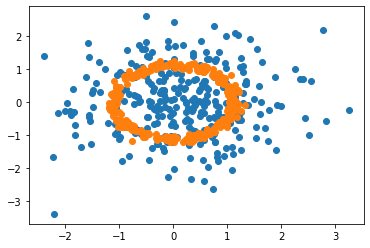

In [43]:
inp = generate_gaussian(0, 0, 1, 1, 300)
out = transfer(inp)
print("z: blue")
print("y: orange")
plot_data(inp)
plot_data(out)

In [ ]:
# Helper fucnitons for creating multiple layer perceptron 


# Initialize a network
def initialize(n_in):
    network = list()
    for i in range(n_in + 1): # each neuron is connected with each other and there is bias
        network.append(0)
    return network
 
# Calculate neuron activation for an input
def activation(weights, inputx, inputy):

    output = weights[0]*inputx + weights[1]*inputy + weights[2]
    return 1 if output>0 else -1


    
# Forward propagate input to a network output
def forward_propagation(network, inputx, inputy):
    output = []
    for i in range(len(inputx)):
        activ = activation(network, inputx[i], inputy[i])
        output.append(activ)
    return output
 

# Backpropagate error and store in neurons
def backward_propagation(network, desired, output, inputx, inputy, etha):
    #error = 0
    for i in range(len(desired)):
        error = (desired[i]-output[i])
        network[0] = network[0] + etha*error*inputx[i]
        network[1] = network[1] + etha*error*inputy[i]
        network[2] = network[2] + etha*error
    return network
 

# Train a network for a fixed number of epochs
def train(network, data, l_rate, n_epoch):
    L = []
    epoch_num = []
    for epoch in range(n_epoch):
        loss = 0
        desired = []
        inputx = []
        inputy = []
        for i in range(len(data)):
            desired.append(data[i][2])
            inputx.append(data[i][0])
            inputy.append(data[i][1])
        output = forward_propagation(network, inputx, inputy)
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        network = backward_propagation(network, desired, output, inputx, inputy, l_rate)
        L.append(loss)
        epoch_num.append(epoch)
    plot2 = plt.figure(2)
    plt.plot(epoch_num, L, linestyle='solid' )
    plt.show()

# sigmoid activation function
def sigmoid(x):
    if x>100:
        return 1
    if x<-100:
        return 0
    return 1/(1+math.exp(-x))

# RelU activation function
def RelU(x):
    if (x>0):
        return x
    else:
        return 0

# we need derivatives of activation functions
def der_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def der_RelU(x):
    if (x>0):
        return 1
    else:
        ret
# which function to apply
def f(x, fun):
    if (fun == "sigmoid"): 
        return sigmoid(x)
    elif(fun == "RelU"):
        return RelU(x)
    else:
        print("error, no such activation function exists") 
        return
    
# which derivative function to apply
def der_f(x, fun):
    if (fun == "sigmoid"): 
        return der_sigmoid(x)
    elif(fun == "RelU"):
        return der_RelU(x)
    else:
        print("error, no such activation function exists") 
        return


In [129]:
def two_hidden_layer_perc(epoch, lr, fun, data, desired, w1, w2, w3): 
    
    # storage
    Loss = []
    epoch_num = []

    output = []
    y_hat = []
    h1_hat = []
    h1 = []
    h2_hat = []
    h2 = []    

    # training loop
    for l in range(epoch): 
        # forward propagation
        for i in range(len(data)):
            inputx = data[i]
            layer1 = []
            sig1 = []
            layer2 = []
            sig2 = []
            for i in range(len(w2)):
                signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
                sig1.append(signal)
                layer1.append(f(signal, fun))
                
            for i in range(len(w3)):
                signal = 0
                for j in range(len(w2)):
                    signal += w2[j][i]*layer1[j]
                sig2.append(signal)
                layer2.append(f(signal, fun))           
            res = 0
            for i in range(len(w3)):
                res+=layer2[i]*w3[i]
            out = f(res, fun)
            output.append(out)
            y_hat.append(res)
            h1.append(layer1)
            h1_hat.append(sig1)
            h2.append(layer2)
            h2_hat.append(sig2)
            
        error = 0
        error = (sum([(desired[i]-output[i]) for i in range(len(desired))]))
        # backward propagation
        for i in range(len(data)):
            loss = 0
            
            delta3 = der_f(res, fun)*error

            for j in range(len(w3)):
                w3[j] = w3[j] + lr*h2[i][j]*delta3

            for j in range(len(w2[0])):
                delta2 = delta3*w3[j]*der_f(h2_hat[i][j], fun)
                for k in range(len(w1)):
                    w2[k][j] = w2[k][j] + lr*h1[i][k]*delta2
            
            for j in range(len(w1[0])):
                delta1 = 0
                for k in range(len(w2[0])):
                    delta1 += delta2*w2[j][k]*der_f(h1_hat[i][j], fun)
                for k in range(len(w1)):
                    w1[k][j] = w1[k][j] + lr*data[i][k]*delta1

        # caclulate loss at this epoch
        loss = 0
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        Loss.append(loss)
        epoch_num.append(l)

    plot2 = plt.figure(2)
    plt.plot(epoch_num, Loss, linestyle='solid' )
    plt.show()
    return w1, w2, w3

def result(data, w1, w2, w3, fun):
    # forward propagation
    output = []
    for i in range(len(data)):
        inputx = data[i]
        layer1 = []
        sig1 = []
        layer2 = []
        sig2 = []
        for i in range(len(w2)):
            signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
            sig1.append(signal)
            layer1.append(f(signal, fun))

        for i in range(len(w3)):
            signal = 0
            for j in range(len(w2)):
                signal += w2[j][i]*layer1[j]
            sig2.append(signal)
            layer2.append(f(signal, fun))           
        res = 0
        for i in range(len(w3)):
            res+=layer2[i]*w3[i]
        out = f(res, fun)
        output.append(out)
        #y_hat.append(res)
        #h1.append(layer1)
        #h1_hat.append(sig1)
        #h2.append(layer2)
        #h2_hat.append(sig2)
    print(output)
    return output

In [109]:
""""
def perceptron(epoch, lr, fun, data, desired, w1, w2, w3): 
    
    # storage
    Loss = []
    epoch_num = []

    output = []
    y_hat = []
    h1_hat = []
    h1 = []
    h2_hat = []
    h2 = []    

    # training loop
    for l in range(epoch): 
        # forward propagation
        for i in range(len(data)):
            inputx = data[i]
            outputx = desired[i]
            #print(inputx)
            layer1 = []
            sig1 = []
            layer2 = []
            sig2 = []
            layer3 = []
            sig3 = []
            for i in range(len(w2)):
                signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
                #print(w1)
                #print("----------------")
                #print(signal)
                sig1.append(signal)
                layer1.append(f(signal, fun))
                
            for i in range(len(w3)):
                signal = 0
                signal = w2[0][i]*layer1[0]+w2[1][i]*layer1[1]
                sig2.append(signal)
                layer2.append(f(signal, fun))           
            res = 0
            for i in range(len(outputx)):
                signal = 0
                signal = w3[0][i]*layer2[0]+w3[1][i]*layer2[1]
                sig3.append(signal)
                res.append(f(signal, fun))                   
                
            out = [f(res[0], fun),f(res[1], fun) ]
            output.append(out)
            y_hat.append(res)
            h1.append(layer1)
            h1_hat.append(sig1)
            h2.append(layer2)
            h2_hat.append(sig2)
            
        error = 0
        error = (sum([(desired[i]-output[i]) for i in range(len(desired))]))
        # backward propagation
        for i in range(len(data)):
            loss = 0
            
            delta3 = der_f(res, fun)*error

            for j in range(len(w3)):
                w3[j] = w3[j] + lr*h2[i][j]*delta3

            for j in range(len(w2[0])):
                delta2 = delta3*w3[j]*der_f(h2_hat[i][j], fun)
                for k in range(len(w1)):
                    w2[k][j] = w2[k][j] + lr*h1[i][k]*delta2
            
            for j in range(len(w1[0])):
                delta1 = 0
                for k in range(len(w2[0])):
                    delta1 += delta2*w2[j][k]*der_f(h1_hat[i][j], fun)
                for k in range(len(w1)):
                    w1[k][j] = w1[k][j] + lr*data[i][k]*delta1

        # caclulate loss at this epoch
        loss = 0
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        Loss.append(loss)
        epoch_num.append(l)

    plot2 = plt.figure(2)
    plt.plot(epoch_num, Loss, linestyle='solid' )
    plt.show()
    return w1, w2, w3

def result(data, w1, w2, w3):
    inputx = data[i]
    #print(inputx)
    layer1 = []
    sig1 = []
    layer2 = []
    sig2 = []
    for i in range(len(w2)):
        signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
        #print(w1)
        #print("----------------")
        #print(signal)
        sig1.append(signal)
        layer1.append(f(signal, fun))

    for i in range(len(w3)):
        signal = 0
        signal = w2[0][i]*layer1[0]+w2[1][i]*layer1[1]
        sig2.append(signal)
        layer2.append(f(signal, fun))           
    res = 0
    for i in range(len(outputx)):
        signal = 0
        signal = w3[0][i]*layer2[0]+w3[1][i]*layer2[1]
        sig3.append(signal)
        res.append(f(signal, fun)) 
        
    #out = [f(res[0], fun),f(res[1], fun) ]
    #output.append(out)
    #y_hat.append(res)
    #h1.append(layer1)
    #h1_hat.append(sig1)
    #h2.append(layer2)
    #h2_hat.append(sig2)
    return res"""

In [133]:
# initial weights before the function call as it optimizes parameter setting process
n = 2
w1 = []
w2 = []
w3 = []

# initialize network
for i in range(n):
    w3.append(uniform(-5, 5))

for j in range(2):
    x = []
    y = []
    for i in range(n):
        x.append(uniform(-5, 5))
    w1.append(x)

for j in range(n):
    x = []
    y = []
    for i in range(n):
        x.append(uniform(-5, 5))      
    w2.append(x)
    

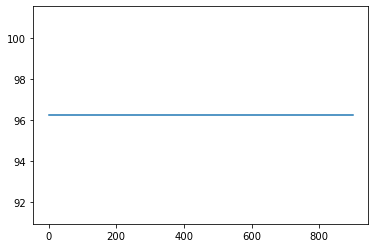

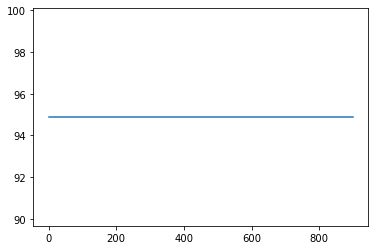

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

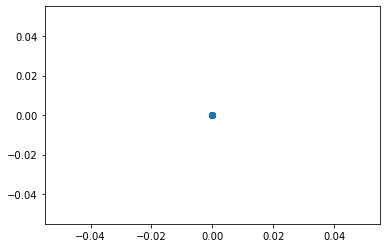

In [139]:
out1 = (out.T)
w11, w21, w31 = two_hidden_layer_perc(900, 0.09, "RelU", inp, out1[0], w1, w2, w3)
w12, w22, w32 = two_hidden_layer_perc(900, 0.09, "RelU", inp, out1[1], w1, w2, w3)

res1 = result(inp, w11, w21, w31, "RelU" )
res2 = result(inp, w12, w22, w32, "RelU")
plt.scatter(res1, res2)

In [177]:
def perceptron(epoch, lr, fun, data, desired, w1, w2, w3): 
    
    # storage
    Loss = []
    epoch_num = []

    output = []
    y_hat = []
    h1_hat = []
    h1 = []
    h2_hat = []
    h2 = []    

    # training loop
    for l in range(epoch): 
        # forward propagation
        for i in range(len(data)):
            inputx = data[i]
            outputx = desired[i]
            #print(inputx)
            layer1 = []
            sig1 = []
            layer2 = []
            sig2 = []
            layer3 = []
            sig3 = []
            for i in range(len(w2)):
                signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
                #print(w1)
                #print("----------------")
                #print(signal)
                sig1.append(signal)
                layer1.append(f(signal, fun))
                
            for i in range(len(w3)):
                signal = 0
                signal = w2[0][i]*layer1[0]+w2[1][i]*layer1[1]
                sig2.append(signal)
                layer2.append(f(signal, fun))           
            res = 0
            for i in range(len(outputx)):
                signal = 0
                signal = w3[0][i]*layer2[0]+w3[1][i]*layer2[1]
                sig3.append(signal)
                res.append(f(signal, fun))                   
                
            out = [f(res[0], fun),f(res[1], fun) ]
            output.append(out)
            y_hat.append(res)
            h1.append(layer1)
            h1_hat.append(sig1)
            h2.append(layer2)
            h2_hat.append(sig2)
            
        error = 0
        error = (sum([(desired[i]-output[i]) for i in range(len(desired))]))
        # backward propagation
        for i in range(len(data)):
            loss = 0
            
            delta3 = der_f(res, fun)*error

            for j in range(len(w3)):
                w3[j] = w3[j] + lr*h2[i][j]*delta3

            for j in range(len(w2[0])):
                delta2 = delta3*w3[j]*der_f(h2_hat[i][j], fun)
                for k in range(len(w1)):
                    w2[k][j] = w2[k][j] + lr*h1[i][k]*delta2
            
            for j in range(len(w1[0])):
                delta1 = 0
                for k in range(len(w2[0])):
                    delta1 += delta2*w2[j][k]*der_f(h1_hat[i][j], fun)
                for k in range(len(w1)):
                    w1[k][j] = w1[k][j] + lr*data[i][k]*delta1

        # caclulate loss at this epoch
        loss = 0
        loss += (sum([0.5*(desired[i]-output[i])**2 for i in range(len(desired))]))
        Loss.append(loss)
        epoch_num.append(l)

    plot2 = plt.figure(2)
    plt.plot(epoch_num, Loss, linestyle='solid' )
    plt.show()
    return w1, w2, w3

def result(data, w1, w2, w3, fun):
    # forward propagation
    output = []
    output1 = []
    for i in range(len(data)):
        inputx = data[i]
        layer1 = []
        sig1 = []
        layer2 = []
        sig2 = []
        n1 = np.random.uniform(0, 0.6)
        n2 = np.random.uniform(0, 0.9)
        for i in range(len(w2)):
            signal = w1[0][i]*inputx[0]+w1[1][i]*inputx[1]
            sig1.append(signal)
            layer1.append(f(signal, fun))
        t = mapping(data[i][0]+n1, data[i][1]+n2)
        for i in range(len(w3)):
            signal = 0
            for j in range(len(w2)):
                signal += w2[j][i]*layer1[j]
            sig2.append(signal)
            layer2.append(f(signal, fun))           
        res = 0
        for i in range(len(w3)):
            res+=layer2[i]*w3[i]
        t1 = f(res, fun)
        output1.append(t)
        output.append(t1)  

    #out = [f(res[0], fun),f(res[1], fun) ]
    #output.append(out)
    #y_hat.append(res)
    #h1.append(layer1)
    #h1_hat.append(sig1)
    #h2.append(layer2)
    #h2_hat.append(sig2)
    return np.array(output1)   



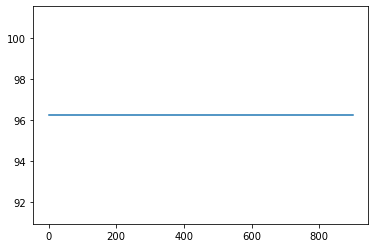

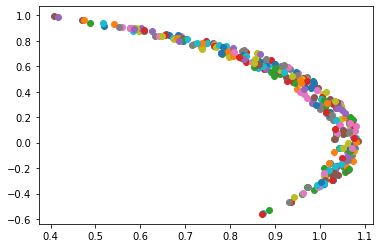

In [179]:
out1 = (out.T)
w1, w2, w3 = two_hidden_layer_perc(900, 0.09, "RelU", inp, out1[0], w1, w2, w3)

res = result(inp, w1, w2, w3, "RelU" )
#print(res)
for i in range(len(res)):
    plt.scatter(res[i][0], res[i][1])